In [1]:
import numpy as np
from sight_line_constructor import Sightline
import read_cubes
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl
from astropy.io import ascii

from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

from scipy import interpolate
from colossus.cosmology import cosmology

%matplotlib widget


#mpl.rc('text', usetex=True)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth'] = 2

In [2]:
path = "/var/lib/libvirt/images/nbody/baorsd/run101/density_field/"
cube = read_cubes.read(path+"S020_CIC1024_conf.bin")

In [3]:
files = ascii.read('/home/mata/cosmic-sightlines/simlist.txt',names=["filename", 'redshift'])
files = files[::-1] #lowest redshift first
redshifts = files['redshift'].data

In [4]:
cosmo = FlatLambdaCDM(H0=100, Om0=0.315)
reds = np.linspace(0.,10.,10000)
dist = cosmo.comoving_distance(reds)
z_dist = interpolate.interp1d(reds, dist)
dists = z_dist(redshifts)

params = {'flat': True, 'H0': 100, 'Om0': 0.315, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95}
cosmo_c = cosmology.setCosmology('myCosmo', params)
growth = cosmo_c.growthFactor(reds)
growth_z = interpolate.interp1d(reds, growth)

growths = growth_z(redshifts)

In [5]:
n_files = len(files)
nc = 1024
L = 2048
res = L/nc

#Function to read in files
l_arr = []
for i in range(len(files)):
    tmp = read_cubes.read(path+str(files[i]['filename']))
    l_arr.append(tmp)



In [6]:
#center of single box is [-L/2,-L/2,-L/2], 
start_point = np.array([0,95,0]) #Mpc/h
end_point = np.array([2500,95,0]) #Mpc/h
#define origin in center of the box
origin = np.array([-L/2,-L/2,-L/2]) #Mpc/h origin of coordinate system
s1 = Sightline(start_point,end_point,origin,periodic=True )

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
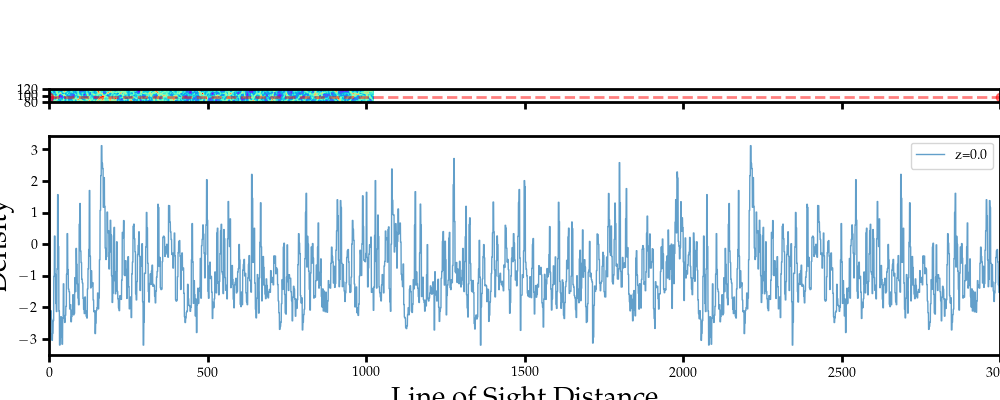

In [7]:
start_point = np.array([0,95,0]) #Mpc/h
end_point = np.array([3000,95,0]) #Mpc/h
r = np.linalg.norm(end_point - start_point)
start = ((start_point-origin) /res)
end =   ((end_point-origin)/res)

XYZ = np.floor(np.linspace(start, end, int(6000))).astype(np.single)


los_delta = ndimage.map_coordinates(l_arr[0], XYZ.T, order=0, mode='grid-wrap')
    
fig, ax = plt.subplots(nrows=2,figsize=(10,4),sharex = True)    
s = np.log(l_arr[0][:,:,512]+1)
ax[0].imshow(s.T,vmin=-3,vmax=3,origin="lower",aspect="equal", interpolation="bilinear", extent=[-1024,1024,-1024,1024],cmap="rainbow")
ax[0].plot([start_point[0], end_point[0]], [start_point[1],  end_point[1]], 'ro--',lw=2,alpha=0.5)
ax[0].set_xlim(0,3000)
ax[0].set_ylim(80,120)


ax[1].plot(np.linspace(0, r, len(los_delta)),np.log(los_delta+1),alpha=0.7,lw=1, label="z="+str(files["redshift"][0]))


ax[1].set_xlabel("Line of Sight Distance",fontsize=20)
ax[1].set_ylabel("Density",fontsize=20)
ax[1].legend()
fig.tight_layout(pad=-1.0)

plt.show()



In [8]:
# dumb the sightlines in an array too
los_arr = []
for i in l_arr:
    los_arr.append(s1.calc_los(res,i))
los_arr = np.asarray(los_arr)

In [9]:
len(s1.los)

50000

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
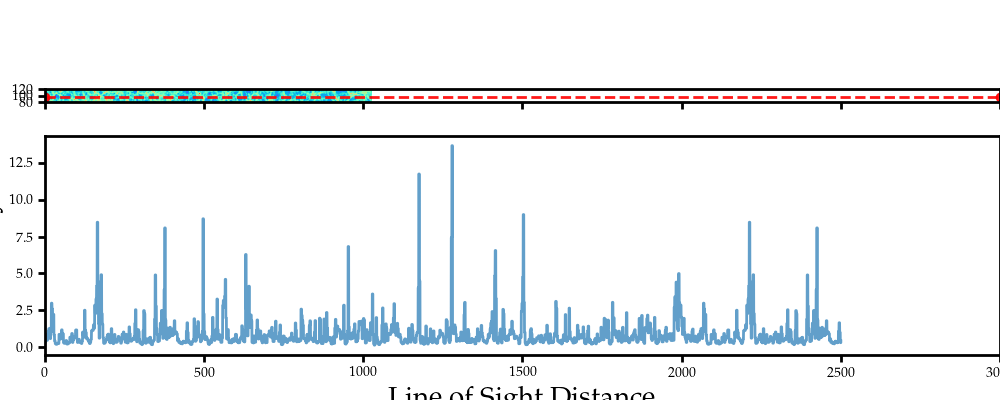

In [10]:
fig, ax = plt.subplots(nrows=2,figsize=(10,4),sharex = True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
s = np.log(l_arr[0][:,:,512]+1)
ax[0].imshow(s.T,vmin=-4,vmax=4,origin="lower",aspect="equal", interpolation="bilinear", extent=[-1024,1024,-1024,1024],cmap="rainbow")
ax[0].plot([start_point[0], end_point[0]], [start_point[1],  end_point[1]], 'ro--',lw=2,alpha=0.9)
ax[0].set_xlim(0,3000)
ax[0].set_ylim(80,120)

ax[1].plot(np.linspace(0, s1.r, len(s1.los)),los_arr[-1]+1,alpha=0.7,lw=2)

#ax[1].set_xlim(0,s1.r)
#ax[1].set_ylim(0,15)

ax[1].set_xlabel("Line of Sight Distance",fontsize=20)
ax[1].set_ylabel("Density",fontsize=20)
fig.tight_layout(pad=-1.0)

In [ ]:
for i in enumerate(dists[1:]):
    los_lightcone = []
    a = np.where(s1.r<i[1])
    

In [26]:
for i in enumerate(dists):
    print (i)

(0, 0.0)
(1, 141.80987523728865)
(2, 283.19353311098473)
(3, 424.3931265883108)
(4, 565.6299761677025)
(5, 707.1204240307925)
(6, 849.057143365236)
(7, 991.6367437193263)
(8, 1135.0435921300777)
(9, 1279.4587518818525)
(10, 1425.0690051837587)
(11, 1572.0561104968174)
(12, 1720.6066636424898)
(13, 1870.9159327230163)
(14, 2023.181082477842)
(15, 2177.6123163187144)
(16, 2334.438094391279)
(17, 2493.881592441237)
(18, 2656.19952512219)
(19, 2821.679913570186)
(20, 2990.5978534860915)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
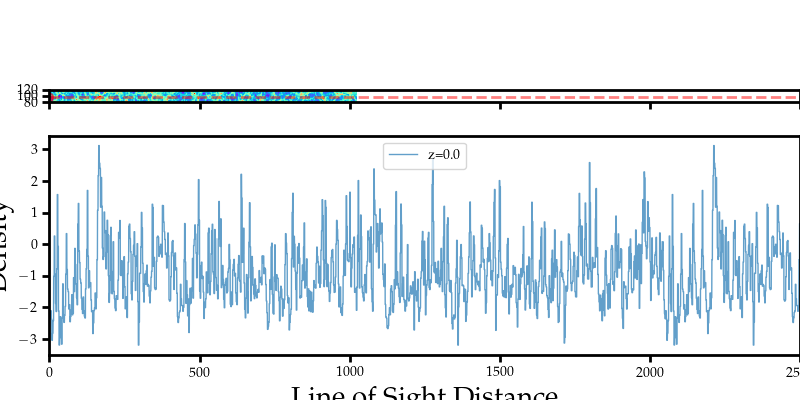

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
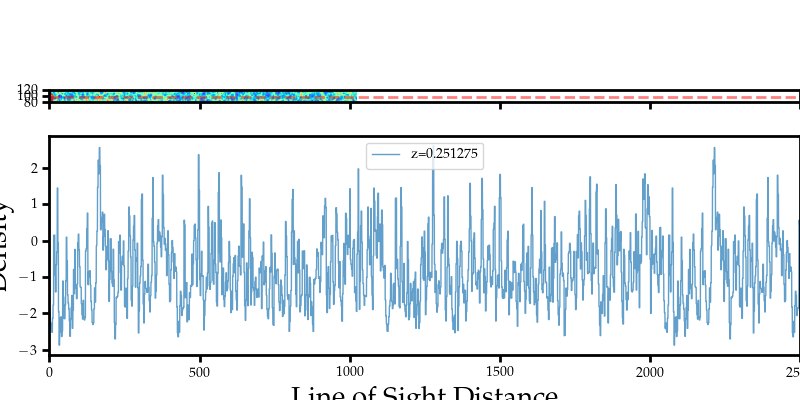

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
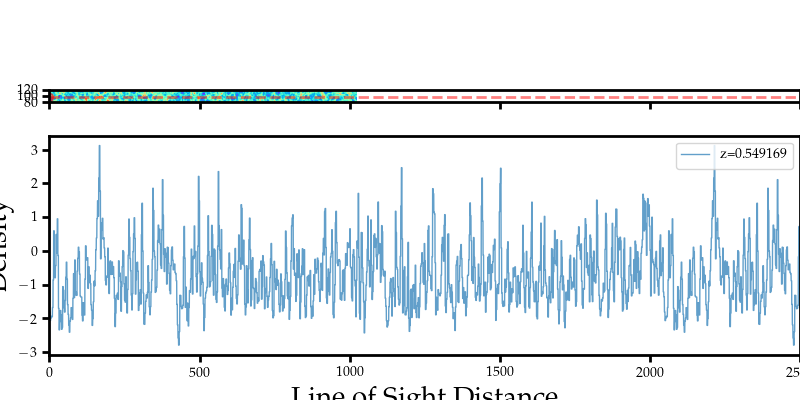

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
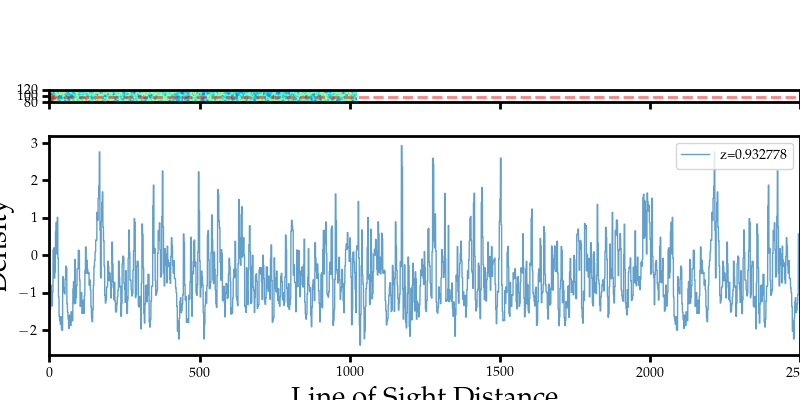

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
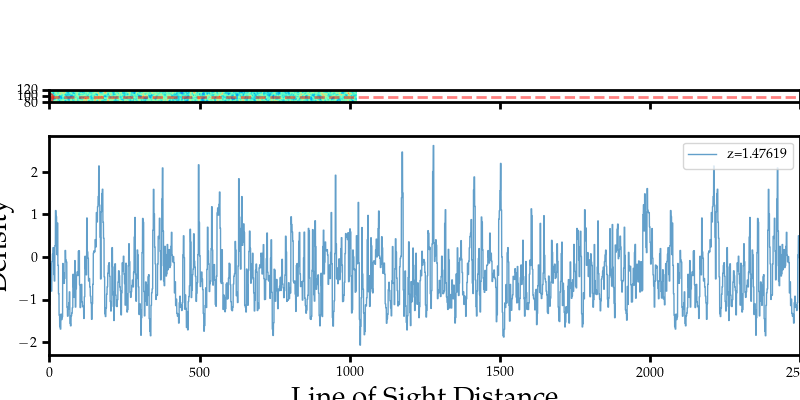

In [15]:
for i in range(len(los_arr))[::5]:
    fig, ax = plt.subplots(nrows=2,figsize=(8,4),sharex = True)    
    s = np.log(l_arr[i][:,:,512]+1)
    ax[0].imshow(s.T,vmin=-3,vmax=3,origin="lower",aspect="equal", interpolation="bilinear", extent=[-1024,1024,-1024,1024],cmap="rainbow")
    ax[0].plot([start_point[0], end_point[0]], [start_point[1],  end_point[1]], 'ro--',lw=2,alpha=0.5)
    ax[0].set_xlim(0,2500)
    ax[0].set_ylim(80,120)


    ax[1].plot(np.linspace(0, s1.r, len(s1.los)),np.log(los_arr[i]+1),alpha=0.7,lw=1, label="z="+str(files["redshift"][i]))


    ax[1].set_xlabel("Line of Sight Distance",fontsize=20)
    ax[1].set_ylabel("Density",fontsize=20)
    ax[1].legend()
    fig.tight_layout(pad=-1.0)


In [33]:
#Solve Poisson Equation with FFT
#phi(x) = 4 pi G IFT[FT[delta/k^2]]

In [34]:
"""Create k^2 in box (nc x nc x nc)"""
def k_box(nc,L):
    kfac = 2.*np.pi/L
    k= np.fft.fftfreq(nc,d=1./nc/kfac) #d controls spacing
    a = np.transpose(np.indices((nc,nc,nc)).T, (2, 1, 0, 3)) #1 grid cell 3 coordinates
    k2=(k[a]**2).sum(axis=-1) # each grid cell is sum of squares of coordinates
    return k2.astype(np.float16)

In [35]:
k2 = k_box(len(l_arr[0]),len(l_arr[0])*res)
delta_k = np.fft.fftn(l_arr[0])
delta_kk2 = delta_k /k2
delta_kk2[0,0,0] =  0
phi_r = np.fft.ifftn(delta_kk2)
phi_r = phi_r.real 

<ipython-input-35-a6bf43d0e16d>:3: RuntimeWarning: divide by zero encountered in true_divide
  delta_kk2 = delta_k /k2
<ipython-input-35-a6bf43d0e16d>:3: RuntimeWarning: invalid value encountered in true_divide
  delta_kk2 = delta_k /k2


Text(0.5, 1.0, '$\\phi$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
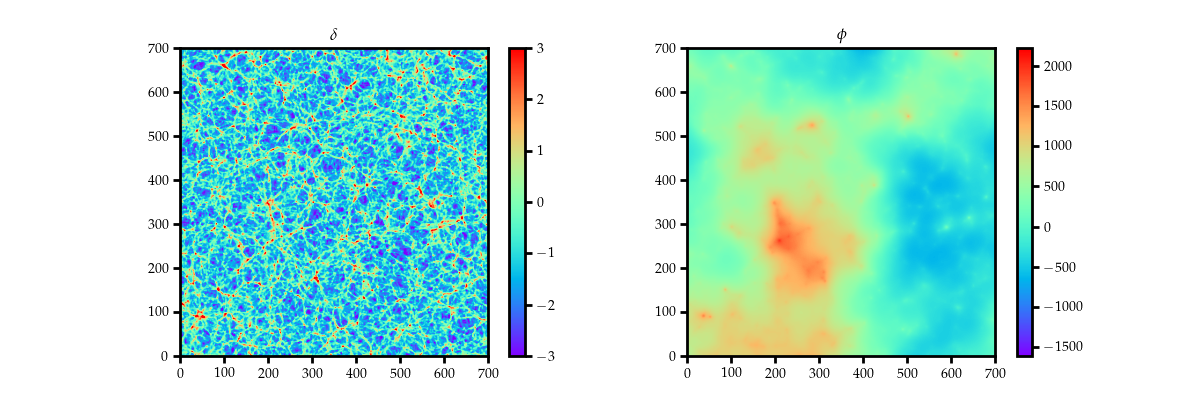

In [58]:
fig, ax = plt.subplots(figsize=(12,4),ncols=2)
s = np.log(l_arr[0][:,:,0]+1)
im0 = ax[0].imshow(s.T,vmin=-3,vmax=3,origin="lower",aspect="equal", interpolation="bilinear", extent=[0,2048.,0,2048],cmap="rainbow")
fig.colorbar(im0,ax=ax[0])
lim = 700
ax[0].set_xlim(0,lim)
ax[0].set_ylim(0,lim)
ax[0].set_title(r"$\delta$")
s = (phi_r[:,:,0])
im1 = ax[1].imshow(s.T,origin="lower",aspect="equal", interpolation="bilinear", extent=[0,2048.,0,2048],cmap="rainbow")
fig.colorbar(im1,ax=ax[1])
ax[1].set_xlim(0,lim)
ax[1].set_ylim(0,lim)
ax[1].set_title(r"$\phi$")



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
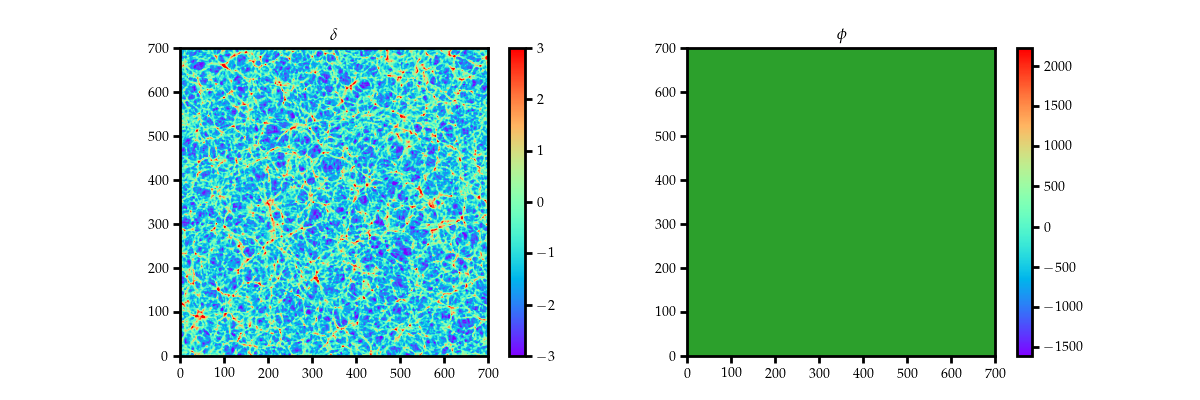

In [71]:
_=plt.hist(phi_r.ravel(),bins=np.linspace(-100,2000,1000))
plt.show()